In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [2]:
df = pd.read_csv("data_for_student_case.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290382 entries, 0 to 290381
Data columns (total 17 columns):
txid                            290382 non-null int64
bookingdate                     290382 non-null object
issuercountrycode               289889 non-null object
txvariantcode                   290382 non-null object
bin                             290242 non-null float64
amount                          290382 non-null float64
currencycode                    290382 non-null object
shoppercountrycode              289900 non-null object
shopperinteraction              290382 non-null object
simple_journal                  290382 non-null object
cardverificationcodesupplied    275665 non-null object
cvcresponsecode                 290382 non-null int64
creationdate                    290382 non-null object
accountcode                     290382 non-null object
mail_id                         290382 non-null object
ip_id                           290382 non-null object
card_id  

In [4]:
date_format = '%Y-%m-%d %H:%M:%S'
df['upd_bookingdate'] = pd.to_datetime(df['bookingdate'], format = date_format)

In [5]:
df['upd_bookingdate'].dt.month

0         11
1         11
2         11
3         11
4         11
5         11
6         11
7         11
8         12
9         11
10        11
11        11
12        12
13        11
14        11
15        11
16        11
17        11
18        12
19        11
20        11
21        12
22        11
23        11
24        11
25        11
26        11
27        11
28        11
29        11
          ..
290352    11
290353    11
290354    10
290355    11
290356    11
290357    11
290358    11
290359    11
290360    11
290361    11
290362    11
290363    11
290364    11
290365    11
290366    11
290367    11
290368    11
290369    11
290370    11
290371    11
290372    11
290373    11
290374    11
290375    11
290376    11
290377    11
290378    11
290379    11
290380    11
290381    11
dtype: int64

In [6]:
monthly_grp = df['amount'].groupby(df['upd_bookingdate'].dt.month).mean()
monthly_grp

1     158086.125000
2      24950.000000
3     181272.500000
7      27424.575040
8      27136.385957
9      27872.429348
10     35431.103721
11     15734.445339
12     77764.532710
Name: amount, dtype: float64

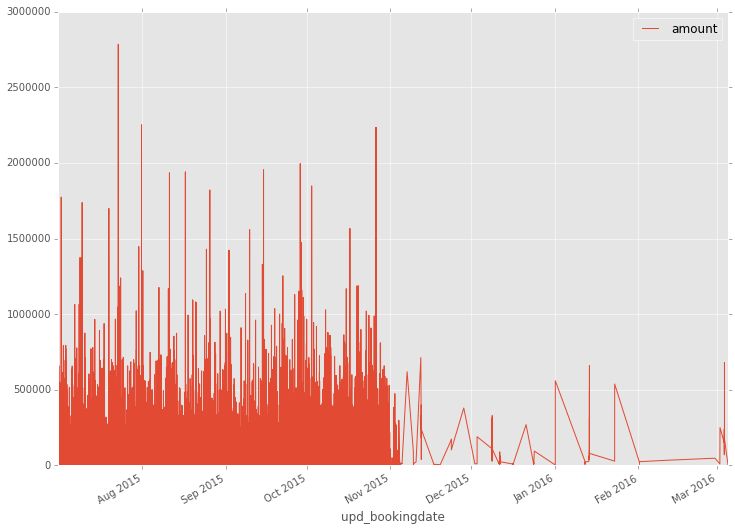

In [7]:
plt.figure();
df.plot(figsize=(12,9), x='upd_bookingdate', y='amount')

In [8]:
df.index

Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9, 
            ...
            290372, 290373, 290374, 290375, 290376, 290377, 290378, 290379,
            290380, 290381],
           dtype='int64', length=290382)

### New try

In [9]:
fraud_d = pd.read_csv('data_for_student_case.csv', parse_dates='creationdate', index_col='creationdate')

In [10]:
fraud_d.head()

,txid,bookingdate,issuercountrycode,txvariantcode,bin,amount,currencycode,shoppercountrycode,shopperinteraction,simple_journal,cardverificationcodesupplied,cvcresponsecode,accountcode,mail_id,ip_id,card_id
creationdate,,,,,,,,,,,,,,,,
2015-07-01 23:03:11,1,2015-11-09 14:26:51,MX,mccredit,530056,64800,MXN,MX,Ecommerce,Chargeback,True,0,MexicoAccount,email68370,ip111778,card184798
2015-07-02 04:50:55,2,2015-11-09 14:27:38,MX,mccredit,547046,44900,MXN,MX,Ecommerce,Chargeback,True,0,MexicoAccount,email101299,ip78749,card151595
2015-07-02 14:30:28,3,2015-11-23 16:34:16,MX,mccredit,528843,149900,MXN,MX,Ecommerce,Chargeback,True,0,MexicoAccount,email278604,ip70594,card242142
2015-07-03 07:53:37,4,2015-11-23 16:34:51,MX,mccredit,547146,109900,MXN,MX,Ecommerce,Chargeback,True,0,MexicoAccount,email47409,ip113648,card181744
2015-07-08 18:35:35,5,2015-11-09 14:26:08,MX,visaclassic,477291,89900,MXN,MX,Ecommerce,Chargeback,True,0,MexicoAccount,email205501,ip83553,card97271


In [11]:
fraud_d.index

DatetimeIndex(['2015-07-01 23:03:11', '2015-07-02 04:50:55',
               '2015-07-02 14:30:28', '2015-07-03 07:53:37',
               '2015-07-08 18:35:35', '2015-07-08 23:04:26',
               '2015-07-09 02:31:36', '2015-07-09 04:56:48',
               '2015-07-09 22:55:40', '2015-07-11 09:44:14', 
               ...
               '2015-10-31 22:43:46', '2015-10-31 22:44:05',
               '2015-10-31 23:01:05', '2015-10-31 23:11:00',
               '2015-10-31 23:20:35', '2015-10-31 23:21:58',
               '2015-10-31 23:31:24', '2015-10-31 23:41:40',
               '2015-10-31 23:50:07', '2015-10-31 23:55:02'],
              dtype='datetime64[ns]', name=u'creationdate', length=290382, freq=None, tz=None)

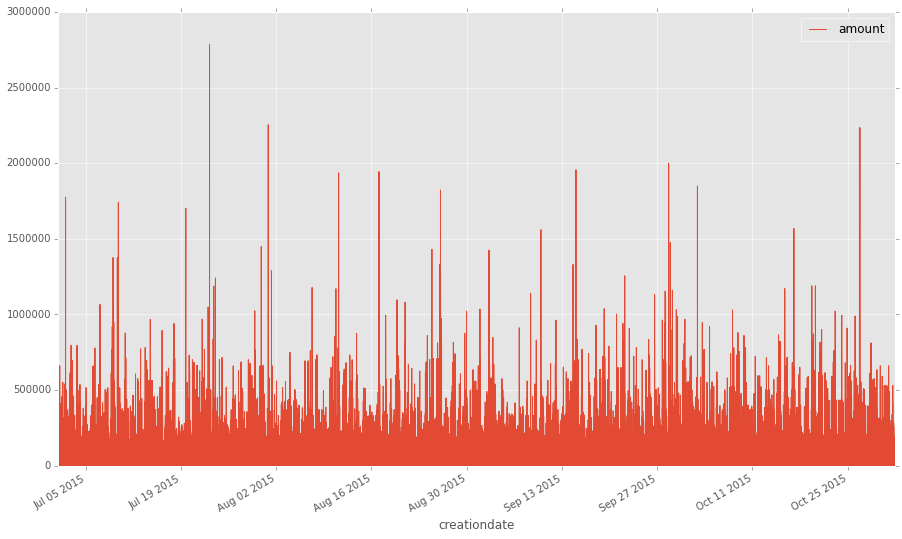

In [12]:
fraud_d.plot(figsize=(15,9), y = 'amount')

## Trying to visualize monthly trends

In [13]:
df1 = fraud_d.groupby(pd.TimeGrouper('M'))

In [15]:
df1.mean()

,txid,bin,amount,cvcresponsecode
creationdate,,,,
2015-07-31,227261.794277,485538.178901,27199.325487,0.772844
2015-08-31,265084.500828,484764.831735,26388.639065,0.773569
2015-09-30,295666.004680,485263.053789,28821.026584,0.755236
2015-10-31,332811.465965,485450.770031,35008.023498,0.773427


In [16]:
monthly_group = fraud_d['amount'].groupby(fraud_d.index.month)

In [20]:
monthly_group.std()

7     64969.020022
8     64032.697801
9     67320.630806
10    75833.002690
Name: amount, dtype: float64

7     Axes(0.125,0.2;0.775x0.7)
8     Axes(0.125,0.2;0.775x0.7)
9     Axes(0.125,0.2;0.775x0.7)
10    Axes(0.125,0.2;0.775x0.7)
dtype: object

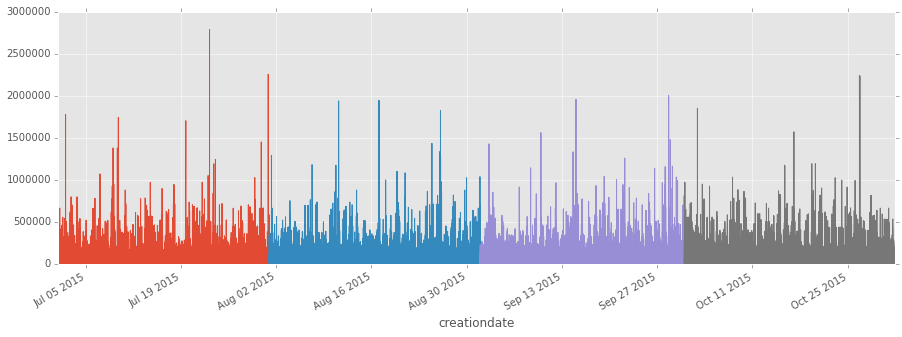

In [21]:
monthly_group.plot(figsize=(15,5))